In [1]:
!pip install opencv-python
!pip install scikit-image

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:0000:0100:01
  Using cached PyWavelets-1.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Using cached tifffile-2023.4.12-py3-none-any.whl (219 kB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 18.2 MB/s eta 0:00:00


# find the nucleus

In [ ]:
import cv2
import numpy as np
from skimage import measure
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def showimg(im):
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    plt.show()

path ='NCKU2_n20.jpg'
im = cv2.imread(path)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray= cv2.equalizeHist(im_gray)

# 圖像增強
blurred_image = cv2.GaussianBlur(im_gray, (5, 5), 0)  # 模圖圖像減少 noise 
showimg(blurred_image)


# Dilate
im_dil = cv2.dilate(blurred_image, None, iterations=5)

# threshold 
ret, im_thresh = cv2.threshold(im_dil , 127, 255, 0)

# Find the contours 
contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw the contours on the original image
cv2.drawContours(im, contours, -1, ( 255, 0, 0,), 3)
# Save
cv2.imwrite('nucleus.png', im)
showimg(im)
print('number of detected contours: ',len(contours))



# find the edge facial profile

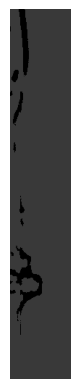

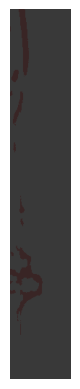

In [11]:
import cv2
import numpy as np
# read image

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
img = cv2.imread("1.bmp")
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w, c = img.shape

# get average color of img
color = cv2.mean(img)[0:3]

# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# do adaptive threshold on gray image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 13)
thresh3 = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

# change white to color
result1 = thresh3.copy()
result1[thresh==255] = color

# optionally colorize text darker and more blue
result2 = result1.copy()
result2[thresh==0] = (color[0],0.65*color[1],0.65*color[2])

show_image(result1)
show_image(result2)


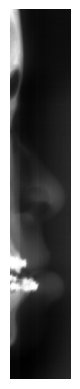

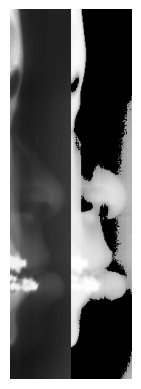

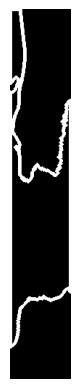

roi_mask


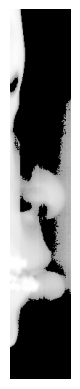

In [7]:
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
image_path = "1.bmp"

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def edge_detection_pre(file_path):
    im_gray = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
    show_image(im_gray)
    raw_image = im_gray.copy()
    im_gray = cv2.equalizeHist(raw_image)
    ret, th1 = cv2.threshold(im_gray, 150, 255, cv2.THRESH_BINARY)
    im_gray[th1 == 0] = 0
    return raw_image, im_gray

raw_img, image = edge_detection_pre(image_path)
Verti2 = np.concatenate((raw_img, image), axis=1)
show_image(Verti2)
copy_image = image.copy()
cnts, _ = cv2.findContours(copy_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filter_cnt = []

for cnt in cnts:
    if cv2.contourArea(cnt) > 80 and len(filter_cnt) == 0:
        filter_cnt.append(cnt)
    elif cv2.contourArea(cnt) < 80:
        pass
    elif cv2.contourArea(cnt) > cv2.contourArea(filter_cnt[0]):
        filter_cnt.pop(0)
        filter_cnt.append(cnt)
                
img = copy_image.copy()
mask = np.zeros(img.shape, dtype='uint8')  #依 Contours 圖形建立mask
cv2.drawContours(mask, filter_cnt, -1, 255, 3)  # 255→白色, -1→塗滿
show_image(mask)
cv2.drawContours(mask, filter_cnt, -1, 255, -1)  # 255→白色, -1→塗滿
roi_mask = cv2.bitwise_and(img, img, mask=mask)
print('roi_mask')
show_image(roi_mask)

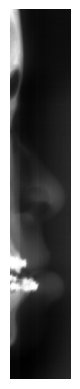

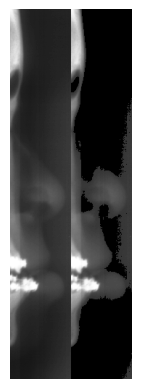

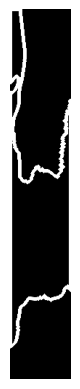

roi_mask


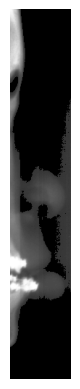

In [4]:
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
image_path = "1.bmp"
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def edge_detection_pre(file_path):
    im_gray = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
    show_image(im_gray)
    raw_image = im_gray.copy()
    # im_gray = cv2.equalizeHist(im_gray)
    ret, th1 = cv2.threshold(im_gray, 50, 255, cv2.THRESH_BINARY)
    im_gray[th1 == 0] = 0
    return raw_image, im_gray

raw_img, image = edge_detection_pre(image_path)
Verti2 = np.concatenate((raw_img, image), axis=1)
show_image(Verti2)

copy_image = image.copy()
cnts, _ = cv2.findContours(copy_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filter_cnt = []

for cnt in cnts:
    if cv2.contourArea(cnt) > 80 and len(filter_cnt) == 0:
        filter_cnt.append(cnt)
    elif cv2.contourArea(cnt) < 80:
        pass
    elif cv2.contourArea(cnt) > cv2.contourArea(filter_cnt[0]):
        filter_cnt.pop(0)
        filter_cnt.append(cnt)
        
img = copy_image.copy()
mask = np.zeros(img.shape, dtype='uint8')  #依 Contours 圖形建立mask
cv2.drawContours(mask, filter_cnt, -1, 255, 3)  # 255→白色, -1→塗滿
show_image(mask)
cv2.drawContours(mask, filter_cnt, -1, 255, -1)  # 255→白色, -1→塗滿
roi_mask = cv2.bitwise_and(img, img, mask=mask)
print('roi_mask')
show_image(roi_mask)

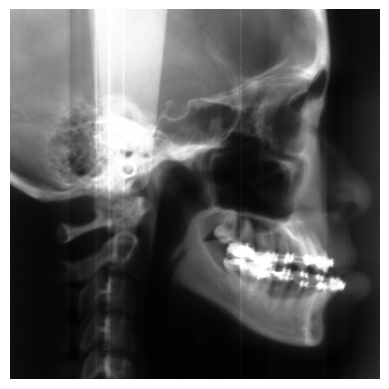

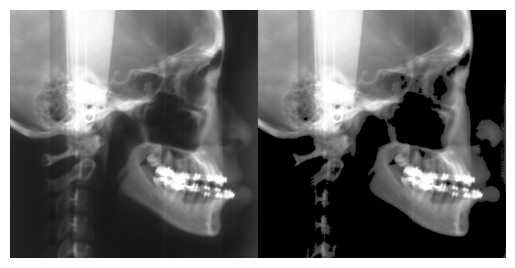

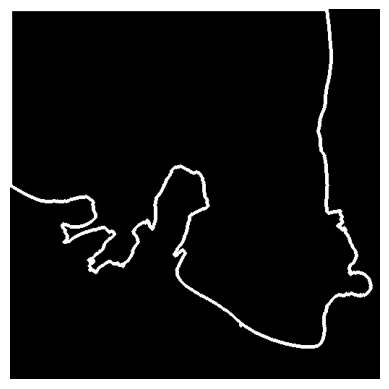

roi_mask


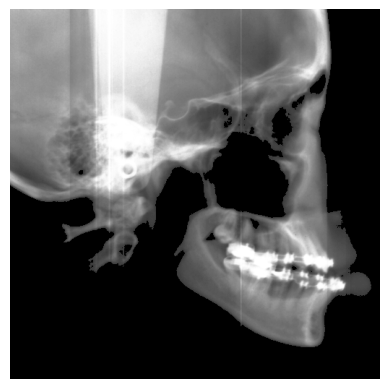

In [40]:
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
# image_path = "Pre_X-ray.bmp"
image_path = "Pre_X-ray(Lateral)(512,512).bmp"


def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def edge_detection_pre(file_path):
    im_gray = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
    show_image(im_gray)
    raw_image = im_gray.copy()
    # im_gray = cv2.equalizeHist(im_gray)
    ret, th1 = cv2.threshold(im_gray, 55, 255, cv2.THRESH_BINARY)
    im_gray[th1 == 0] = 0
    thresh = 40
    return raw_image, im_gray

raw_img, image = edge_detection_pre(image_path)
Verti2 = np.concatenate((raw_img, image), axis=1)
show_image(Verti2)

# find  contour
copy_image = image.copy()
cnts, _ = cv2.findContours(copy_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filter_cnt = []
for cnt in cnts:
    if cv2.contourArea(cnt) > 80 and len(filter_cnt) == 0:
        filter_cnt.append(cnt)
    elif cv2.contourArea(cnt) < 80:
        pass
    elif cv2.contourArea(cnt) > cv2.contourArea(filter_cnt[0]):
        filter_cnt.pop(0)
        filter_cnt.append(cnt)
        
img = copy_image.copy()
mask = np.zeros(img.shape, dtype='uint8')  # 依 Contours 圖形建立mask
# cv2.drawContours(mask, filter_cnt, -1, 255, -1)  # 255        →白色, -1→塗滿
cv2.drawContours(mask, filter_cnt, -1, 255, 3)  # 255        →白色, -1→塗滿
show_image(mask)
cv2.drawContours(mask, filter_cnt, -1, 255, -1)  # 255        →白色, -1→塗滿
roi_mask = cv2.bitwise_and(img, img, mask=mask)
print('roi_mask')
show_image(roi_mask)

In [60]:
import cv2
import numpy as np

# Step 1: Load the image
image = cv2.imread(path2)
# Step 2: Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Step 3: Enhance the image
enhanced_image = cv2.equalizeHist(gray)  # 增強圖像
blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)  # 模圖圖像減少 noise 

# Step 4: Apply edge detection (Canny algorithm)
edges = cv2.Canny(blurred_image, 0, 155)
# Step 5: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.imwrite('Profile2.png', edges)

True

In [1]:
import cv2
import numpy as np
from skimage import measure
# path ='NCKU2_n20.jpg'
im = cv2.imread(path2)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# 圖像增強
enhanced_image = cv2.equalizeHist(im_gray)  # 增強圖像
blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)  # 模圖圖像減少 noise 
# Dilate - grow each bounded region
im_dil = cv2.dilate(blurred_image, None, iterations=4)
# threshold setting 
ret, im_thresh = cv2.threshold(im_dil, 127, 255, 0)
# Find the contours (boundary of the white region)  
contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ModuleNotFoundError: No module named 'cv2'